In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
print((major_ver, minor_ver, subminor_ver) )

('4', '1', '1')


In [4]:
cap = cv2.VideoCapture('bohemian_rhapsody_live_aid.mp4')

In [5]:
total_frames = cap.get(7)

In [6]:
total_frames

10885.0

In [7]:
fps = cap.get(cv2.CAP_PROP_FPS)
print(fps)

59.94005994005994


In [8]:
total_frames/60

181.41666666666666

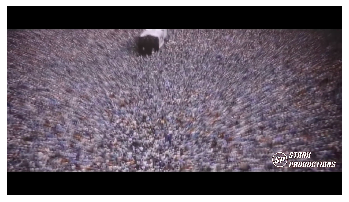

In [9]:
cap.set(1, 600)
ret, frame = cap.read()
plt.axis('off')
plt.imshow(frame)
plt.show()

In [9]:
frames_to_analyze = []
w = 60
jump = 120
for i in range(w + 1, int(total_frames), 2 * w + 1):
    cap.set(1, i)
    _, frame = cap.read()
    
    cap.set(1, i - 2 * w + 1)
    ret, past_frame = cap.read()
    
    frames_to_analyze.append([past_frame, frame])

KeyboardInterrupt: 

In [15]:
def show_frames(index, figsize=20):
    fig = plt.figure(figsize=(figsize, figsize))
    ax1 = fig.add_subplot(2,2,1)
    
    cap.set(1, i)
    _, frame = cap.read()
    
    cap.set(1, i - 2 * w + 1)
    ret, past_frame = cap.read()
    
    ax1.imshow(past_frame)
    ax1.axis('off')
    ax2 = fig.add_subplot(2,2,2)
    ax2.imshow(frame)
    ax2.axis('off')

In [11]:
# show_frames(13)
# show_frames(50)

In [12]:
import math

def diff_color(img, i, j, m, n):
    return (int(np.linalg.norm(img[i][j] - img[m][n])) > 0)

def calc_histogram(img):
    lines = img.shape[0]
    cols = img.shape[1]
    
#     print(lines * cols)
    
    max_size = 256
    histogram_red = np.zeros(max_size)
    histogram_green = np.zeros(max_size)
    histogram_blue = np.zeros(max_size)

    '''
    quantized = np.zeros((lines, cols, 3))
    segmented = np.zeros((lines, cols, 3))

    bins = 64
    histogram_border = np.zeros(bins)
    histogram_interior = np.zeros(bins)
    
    for i in range(0, lines):
        for j in range(0, cols):
            quantized[i][j] = img[i][j] // bins

    for i in range(1, lines - 1, 1):
        for j in range(1, cols - 1, 1):
            if(diff_color(quantized, i-1, j, i, j) or diff_color(quantized, i, j-1, i, j) or
                diff_color(quantized, i+1, j, i, j) or diff_color(quantized, i, j+1, i, j)):
                segmented[i][j] = [0, 0, 0] # Borda
            else:
                segmented[i][j] = [255, 255, 255] # Interior

      #############################

            mapped_int = int(quantized[i][j][0]) * 16 + \
                int(quantized[i][j][1]) * 4 + int(quantized[i][j][2])

            if segmented[i][j][0] == 0: # borda
                histogram_border[mapped_int] += 1
            else: # interior
                histogram_interior[mapped_int] += 1
    '''
    for i in range(0, lines):
        for j in range(0, cols):
            blue = img[i][j][0]
            red = img[i][j][2]
            green = img[i][j][1]

            histogram_blue[blue] += 1
            histogram_red[red] += 1
            histogram_green[green] += 1
    
    histogram_total = list(histogram_red) + list(histogram_green) + list(histogram_blue)
    
#     print(len(histogram_total))

#     histogram_total = np.concatenate((histogram_border, histogram_interior), axis=None)
      
    return histogram_total

def array_to_log(arr):
    return np.array([x if x <= 1 else math.log2(x) for x in arr])

def global_histogram(images):
#     show_frames(index)
    hist1 = calc_histogram(images[0])
    hist2 = calc_histogram(images[1])
    
    return (np.absolute(array_to_log(hist1) - array_to_log(hist2)).sum()) / (9971.486355962)

31 => 0.015977602013866943
92 => 0.4164724054609451
153 => 0.4341413810386323
214 => 0.17525499077276194
275 => 0.02127071379754002
336 => 0.024915365776913095
397 => 0.024777328523956074
458 => 0.040422667830910745
519 => 0.060363254912370365
580 => 0.06893811763552166
641 => 0.0470624089405692
702 => 0.0677141727372301
763 => 0.0627545760737858
824 => 0.06117208493310883
885 => 0.073092765363149
946 => 0.03484356138038634
1007 => 0.03294852095231017
1068 => 0.029855794410977014
1129 => 0.029814547261795287
1190 => 0.03634990085499405
1251 => 0.03065578936627837
1312 => 0.04212688640351107
1373 => 0.03801217603855057
1434 => 0.0393565359592363
1495 => 0.03254203626408879
1556 => 0.04433047307067309
1617 => 0.058135756943117005
1678 => 0.0370606459431723
1739 => 0.022042122965441172
1800 => 0.029409553405476248
1861 => 0.03484065463066727
1922 => 0.031097935204479593
1983 => 0.037247116545258446
2044 => 0.04667125356657707
2105 => 0.023917686379583882
2166 => 0.0362908793018827
2227 =>

"\nfor frames in frames_to_analyze:\n    diff = global_histogram(frames)\n    \n    print(diff)\n    \n    if (diff > 0.15):\n        print('Corte')\n"

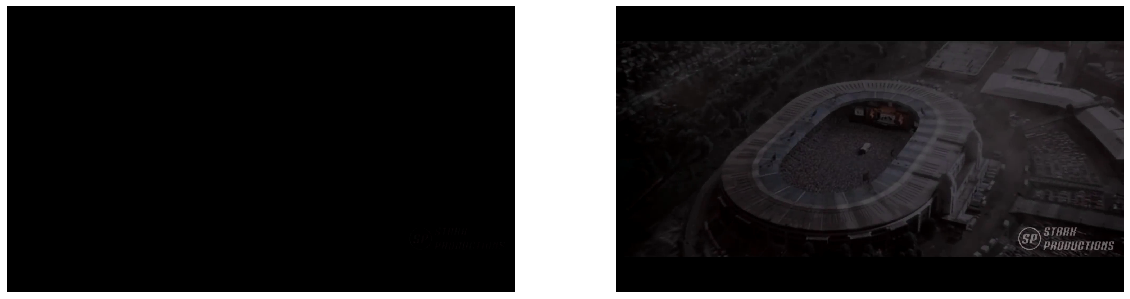

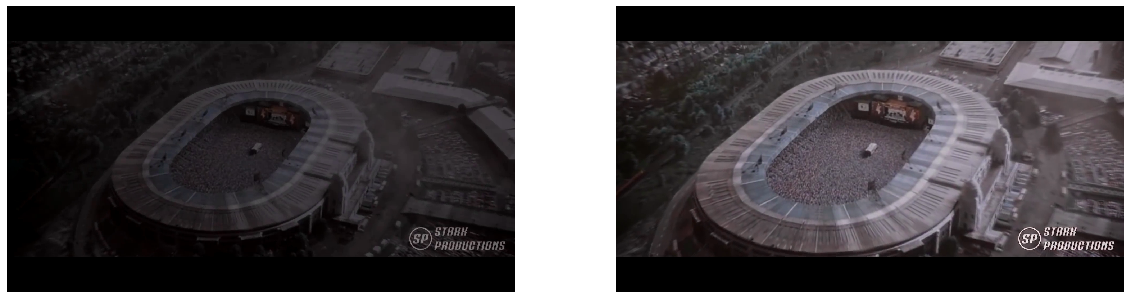

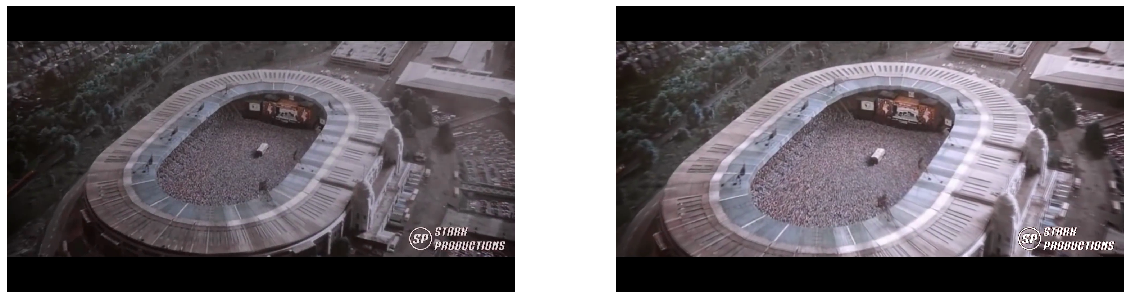

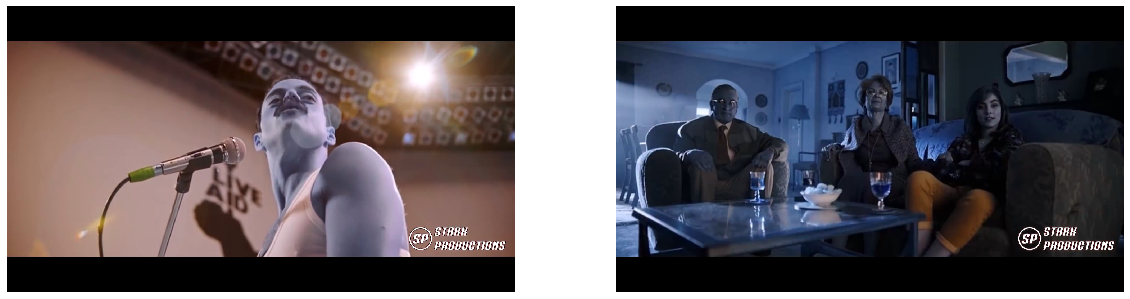

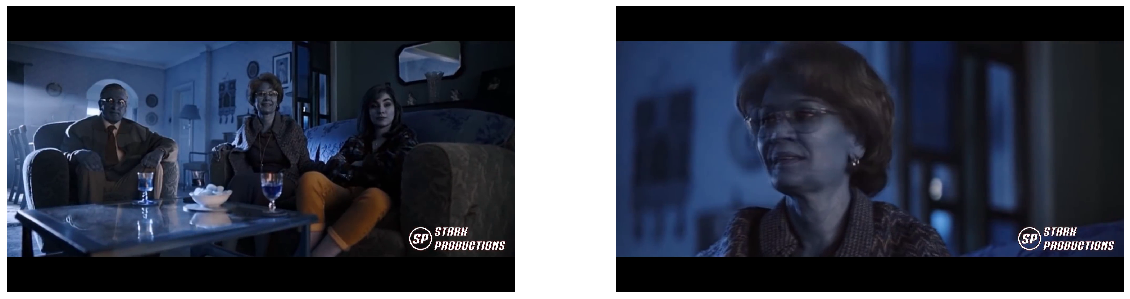

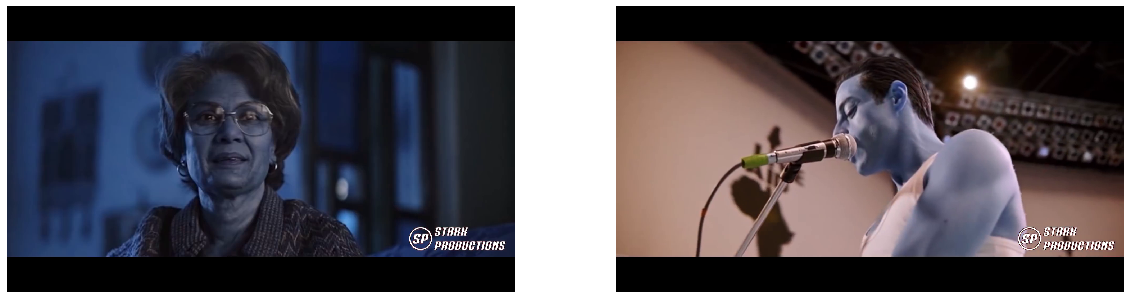

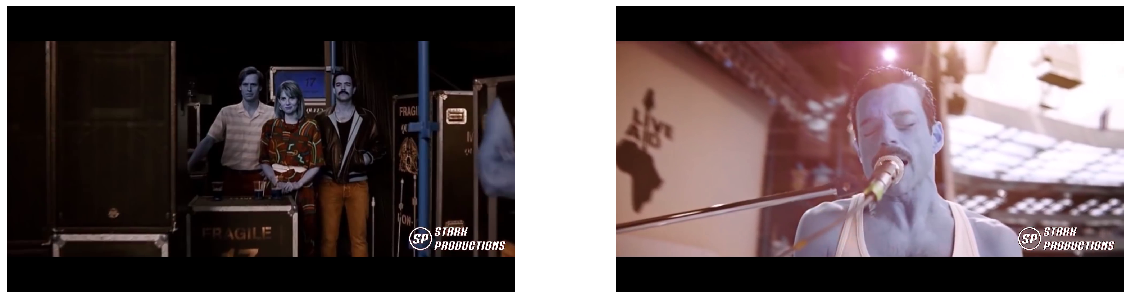

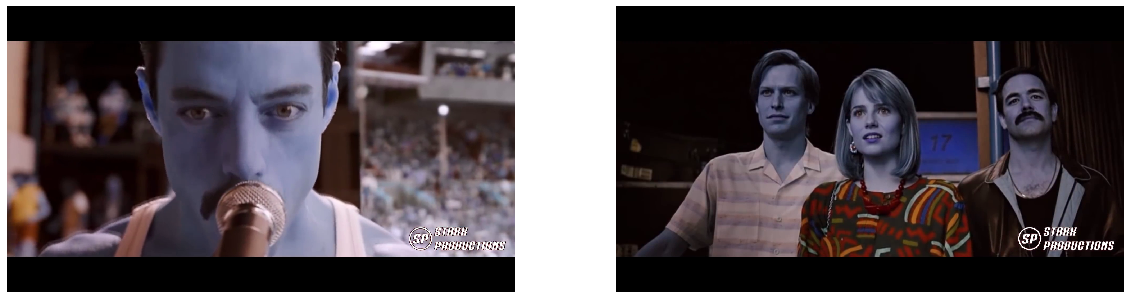

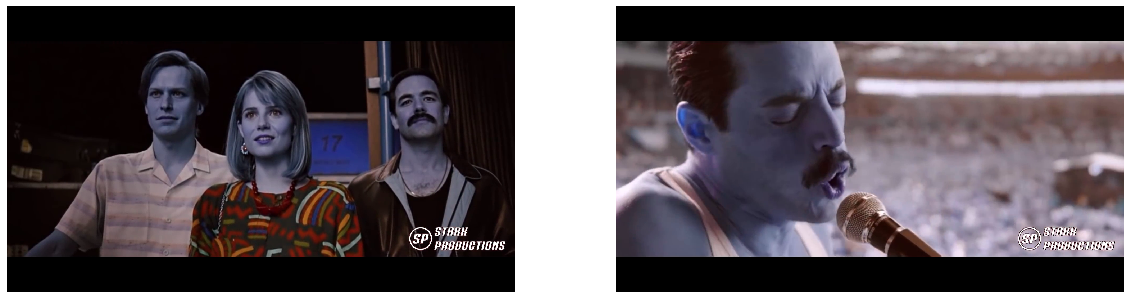

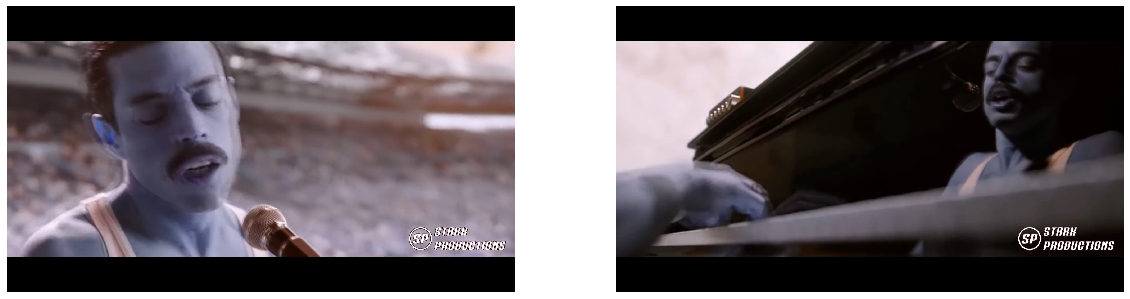

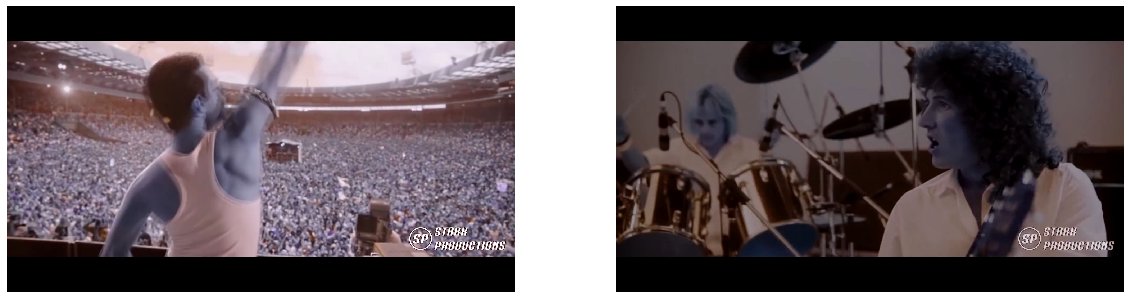

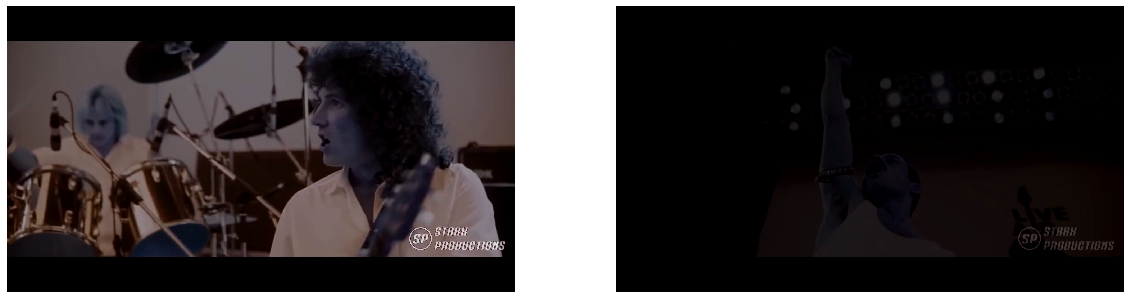

In [17]:
w = 30
i = w + 1

variableWindow = False

while (i < int(total_frames)):
    cap.set(1, i)
    _, frame = cap.read()
    
    cap.set(1, i - 2 * w + 1)
    ret, past_frame = cap.read()
    
    diff = global_histogram([past_frame, frame])
    
    print(i, '=>', diff)
    
    if (diff > 0.15):
#         print('Corte-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~')
        show_frames(i)
        
    if (variableWindow):
        if (diff > 0.2 and w > 30):
            w -= 1
        elif (diff < 0.1 and w < 90):
            w += 1
        print('w =',w)
        
    i += 2 * w + 1

'''
for frames in frames_to_analyze:
    diff = global_histogram(frames)
    
    print(diff)
    
    if (diff > 0.15):
        print('Corte')
'''
    
# lines * cols == 2073600
# 9971,486355962

In [18]:
int(total_frames)

10885